In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import spacy
from collections import Counter
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_md")

In [3]:
soubor = pd.read_csv('C:/Users/zbyne/Downloads/hotel_reviews.csv')
len(soubor) #515738
soubor.head(5)
#Latitude and longitude = Zemìpisná šíøka a zemìpisná délka

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [4]:
soubor.info()

526


In [5]:
#chybí nìjaké hodnoty?
soubor.isna().sum()/(len(soubor))

Hotel_Address                                 0.000000
Additional_Number_of_Scoring                  0.000000
Review_Date                                   0.000000
Average_Score                                 0.000000
Hotel_Name                                    0.000000
Reviewer_Nationality                          0.000000
Negative_Review                               0.000000
Review_Total_Negative_Word_Counts             0.000000
Total_Number_of_Reviews                       0.000000
Positive_Review                               0.000000
Review_Total_Positive_Word_Counts             0.000000
Total_Number_of_Reviews_Reviewer_Has_Given    0.000000
Reviewer_Score                                0.000000
Tags                                          0.000000
days_since_review                             0.000000
lat                                           0.006337
lng                                           0.006337
dtype: float64

In [6]:
#poèet hotelù v souboru
len(pd.unique(soubor['Hotel_Address']))

1493

In [7]:
#základní pøehled
soubor.groupby(['Hotel_Name']).mean()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,lat,lng
Hotel_Name,,,,,,,,,
11 Cadogan Gardens,101.0,8.7,15.528302,393.0,19.974843,7.226415,8.845283,51.493616,-0.159235
1K Hotel,69.0,7.7,24.932432,663.0,15.601351,9.141892,7.861486,48.863932,2.365874
25hours Hotel beim MuseumsQuartier,391.0,8.8,16.161103,4324.0,21.911466,8.722787,8.983309,48.206474,16.354630
41,66.0,9.6,8.883495,244.0,25.300971,6.009709,9.711650,51.498147,-0.143649
45 Park Lane Dorchester Collection,27.0,9.4,6.750000,68.0,11.535714,7.214286,9.603571,51.506371,-0.151536
...,...,...,...,...,...,...,...,...,...
citizenM London Bankside,804.0,9.1,13.977587,3802.0,20.856295,9.768622,9.112261,51.505151,-0.100472
citizenM London Shoreditch,500.0,9.1,14.439141,2113.0,21.620525,8.219570,9.092005,51.524137,-0.078698
citizenM Tower of London,832.0,9.1,15.623292,4672.0,24.430778,9.334522,9.135591,51.510237,-0.076443


<AxesSubplot:xlabel='Reviewer_Score', ylabel='count'>

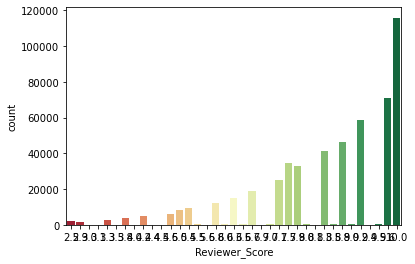

In [8]:
#rozložení skóre recenzí, né uplnì pìkný.
df = soubor['Reviewer_Score']
sns.countplot(x="Reviewer_Score",data=soubor,palette="RdYlGn")

<AxesSubplot:xlabel='P/N', ylabel='count'>

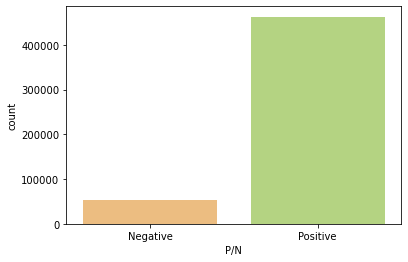

In [9]:
#pokus o rozdìlení hodnot na základì reviewer score dle hranice  0-6 negativní ...
soubor["P/N"] = pd.cut(soubor["Reviewer_Score"], 
                   bins=[0,6,10], 
                   labels=["Negative","Positive"],right=True)
sns.countplot(x="P/N",data=soubor,palette="RdYlGn")

In [10]:
subset = soubor[['Reviewer_Nationality','P/N']]
subset.groupby("P/N").count()

,Reviewer_Nationality
P/N,
Negative,52760
Positive,462978


In [11]:
stat = soubor['Hotel_Address']

In [12]:
print ([token.text for token in nlp(stat[22000])])

['10', 'rue', 'de', 'Bruxelles', '9th', 'arr', '75009', 'Paris', 'France']


In [13]:
x = [token.text for token in nlp(stat[10000])]
x[-1]

'Kingdom'

In [15]:
#extrahovani statu z adres hotelù a následné pøidání státù do df
stat = soubor['Hotel_Address']
staty = []

for i in range(0,len(soubor)):
    x = [token.text for token in nlp(stat[i])][-1]
    if x == "Kingdom":
        x = 'United Kingdom'
    staty.append(x)

soubor['stat'] = staty
print('Transformation was successful.')

Transformation was successful.


In [16]:
#kontrola
pd.unique(soubor['stat'])

array(['Netherlands', 'United Kingdom', 'France', 'Spain', 'Italy',
       'Austria'], dtype=object)

In [18]:
#kontrola
soubor.head(3)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng,P/N,stat
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Negative,Netherlands
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968,Positive,Netherlands
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968,Positive,Netherlands


In [19]:
#Nejèastìjší podstatná jména v negativních recenzích na vzorku ze souboru
vzorek = soubor[0:9000]

vzorek_negative_review_list = list(vzorek['Negative_Review'])
delimiter = ','
final_str = delimiter.join(map(str, vzorek_negative_review_list))
doc = nlp(final_str)
nouns = [token.lemma_ for token in doc if token.is_stop != True and token.is_punct != True and token.pos_ == 'NOUN']
word_freq = Counter(nouns)
word_freq.most_common(10)

[('room', 4292),
 ('hotel', 1446),
 ('breakfast', 859),
 ('bed', 807),
 ('bathroom', 633),
 ('staff', 617),
 ('night', 592),
 ('time', 504),
 ('shower', 476),
 ('bit', 438)]

In [20]:
#Nejèastìjší slovesa v negativních recenzích na vzorku prvnich 9000 ze souboru
vzorek = soubor[0:9000]

vzorek_negative_review_list = list(vzorek['Negative_Review'])
delimiter = ','
final_str = delimiter.join(map(str, vzorek_negative_review_list))
doc = nlp(final_str)
verbs = [token.lemma_ for token in doc if token.is_stop != True and token.is_punct != True and token.pos_ == 'VERB']
word_freq = Counter(verbs)
word_freq.most_common(10)

[('book', 437),
 ('pay', 396),
 ('stay', 378),
 ('ask', 357),
 ('need', 331),
 ('get', 306),
 ('tell', 284),
 ('work', 270),
 ('go', 249),
 ('give', 249)]

In [21]:
#pøídavná jména spojena s nìjèastìjšími podst. jmény v negativních recenzí na vzorku 9000

pattern = [{'POS': 'ADJ'},{'TEXT': 'room'}]
list1 = []
matcher = Matcher(nlp.vocab)
matcher.add('ADJ_NOUN_PATTERN', None, pattern)

for i in range(0,len(vzorek)):
    doc = nlp(vzorek.iloc[i,6])
    matches = matcher(doc)
    for match_id, start, end in matches:
        list1.append(doc[start:end].text)



In [22]:
from collections import Counter
def most_frequent(List):
    List = [x.lower() for x in List]
    occurence_count = Counter(List)
    return occurence_count.most_common(5)

In [23]:
print(most_frequent(list1))

[('small room', 128), ('double room', 75), ('twin room', 38), ('wet room', 33), ('tiny room', 33)]


In [24]:
#pøídavná jména spojena s nìjèastìjšími podst. jménem "ROOM" v negativních recenzí na souboru

pattern = [{'POS': 'ADJ'},{'TEXT': 'room'}]
list1 = []
matcher = Matcher(nlp.vocab)
matcher.add('ADJ_NOUN_PATTERN', None, pattern)

for i in range(0,len(soubor)):
    doc = nlp(soubor.iloc[i,6])
    matches = matcher(doc)
    for match_id, start, end in matches:
        list1.append(doc[start:end].text)



In [25]:
print(most_frequent(list1))

[('small room', 4952), ('double room', 2126), ('single room', 1172), ('twin room', 1094), ('first room', 1056)]


In [33]:
#pøídavná jména spojena s nìjèastìjšími podst. jménem "Breakfast" v negativních recenzí na souboru

pattern = [{'POS': 'ADJ'},{'TEXT': 'breakfast'}]
list_breakfast = []
matcher = Matcher(nlp.vocab)
matcher.add('ADJ_NOUN_PATTERN', None, pattern)

for i in range(0,len(soubor)):
    doc = nlp(soubor.iloc[i,6])
    matches = matcher(doc)
    for match_id, start, end in matches:
        list_breakfast.append(doc[start:end].text)

In [34]:
print(most_frequent(list_breakfast))

[('expensive breakfast', 737), ('poor breakfast', 724), ('continental breakfast', 715), ('english breakfast', 629), ('cooked breakfast', 464)]


<AxesSubplot:xlabel='stát', ylabel='rel_pocty'>

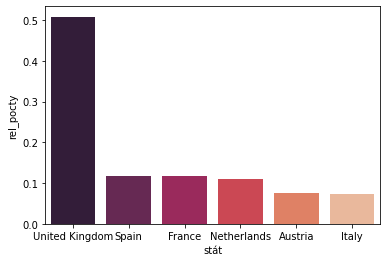

In [28]:
#relativní poèty recenzí k hotelùm, resp. kolik recenzí se stahovalo k jaké zemi
import seaborn as sns
rel_l = []
rel_ln = ['United Kingdom','Spain','France','Netherlands','Austria','Italy']
for i in list(soubor['stat'].value_counts()):
    rel = i/len(soubor)
    rel_l.append(rel)
temp = pd.DataFrame()
temp['stát'] = rel_ln
temp ['rel_pocty'] = rel_l
temp
sns.barplot(y='rel_pocty',x="stát",data=temp,palette="rocket")

<AxesSubplot:xlabel='Reviewer_Nationality', ylabel='count'>

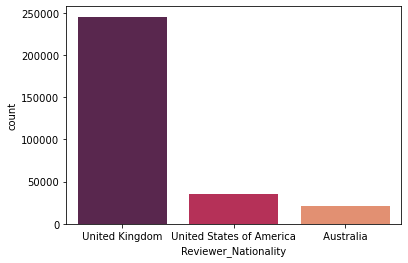

In [29]:
#nejèastìjší národnost hostù - 3
sns.countplot(x='Reviewer_Nationality',data=soubor,palette="rocket",order=soubor.Reviewer_Nationality.value_counts().iloc[:3].index)

In [30]:
#absolutní poèty nejèastìjších národností
soubor['Reviewer_Nationality'].value_counts()

 United Kingdom               245246
 United States of America      35437
 Australia                     21686
 Ireland                       14827
 United Arab Emirates          10235
                               ...  
 Anguilla                          1
 Tuvalu                            1
 Svalbard Jan Mayen                1
 Palau                             1
 Northern Mariana Islands          1
Name: Reviewer_Nationality, Length: 227, dtype: int64

In [31]:
#kontingenèní tabulka
mask = soubor['Reviewer_Nationality'].isin([' United Kingdom ',' United States of America ', ' Australia ',' Ireland ',' United Arab Emirates ',' Slovakia ', ' Czech Republic '])
table = soubor[mask].pivot_table(
        values='Hotel_Address', 
        index='Reviewer_Nationality',
        columns='stat', 
        aggfunc='count', 
        margins=True
    )
table

stat,Austria,France,Italy,Netherlands,Spain,United Kingdom,All
Reviewer_Nationality,,,,,,,
Australia,1680,3904,2677,2045,2907,8473,21686
Czech Republic,832,198,306,231,280,464,2311
Ireland,710,1327,607,3029,2134,7020,14827
Slovakia,306,73,130,109,108,177,903
United Arab Emirates,1163,1539,1241,1097,1331,3864,10235
United Kingdom,7507,16908,6205,23016,20961,170649,245246
United States of America,3104,7279,3082,4792,6169,11011,35437
All,15302,31228,14248,34319,33890,201658,330645


In [35]:
soubor['stat'].value_counts()

United Kingdom    262301
Spain              60149
France             59928
Netherlands        57214
Austria            38939
Italy              37207
Name: stat, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 19 columns):
 #   Column                                      Non-Null Count   Dtype   
---  ------                                      --------------   -----   
 0   Hotel_Address                               515738 non-null  object  
 1   Additional_Number_of_Scoring                515738 non-null  int64   
 2   Review_Date                                 515738 non-null  object  
 3   Average_Score                               515738 non-null  float64 
 4   Hotel_Name                                  515738 non-null  object  
 5   Reviewer_Nationality                        515738 non-null  object  
 6   Negative_Review                             515738 non-null  object  
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64   
 8   Total_Number_of_Reviews                     515738 non-null  int64   
 9   Positive_Review                             515738 non-null

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import collections
import time

In [ ]:
# loads selected columns into variable hotel_reviews and changes their data types
hotel_reviews = pd.read_csv("Hotel_Reviews.csv", 
                 index_col=False,
                 usecols=['Hotel_Address',
                          'Additional_Number_of_Scoring',
                          'Average_Score',
                          'Hotel_Name',
                          'Reviewer_Nationality',
                          'Negative_Review',
                          'Positive_Review',
                          'Reviewer_Score',
                          'Total_Number_of_Reviews_Reviewer_Has_Given', 
                          'Tags'],
                 dtype={'Hotel_Address':'string',
                          'Additional_Number_of_Scoring':'float',
                          'Average_Score':'float',
                          'Hotel_Name':'string',
                          'Reviewer_Nationality':'string',
                          'Negative_Review':'string',
                          'Positive_Review':'string',
                          'Reviewer_Score':'float',
                          'Total_Number_of_Reviews_Reviewer_Has_Given':'int', 
                          'Tags':'string'})

In [ ]:
# saves data without duplicate rows into variable df
df = hotel_reviews.drop_duplicates()

# replaces default review answer No Negative and No Positive to blank string
df.Negative_Review = df.Negative_Review.replace('No Negative', '')
df.Positive_Review = df.Positive_Review.replace('No Positive', '')

# rounds score to 0 decimal places
df = df.round({'Reviewer_Score':0})
df = df.round({'Average_Score':0})

In [ ]:
# prints basic information about cleaned dataframe
print(df.shape)
print(df.describe())
print(df.info())

In [ ]:
# histograms of columns Reviewer_Score and Average_Score
ax = sns.countplot(data = df, x = 'Reviewer_Score')
ax = sns.countplot(data = df, x = 'Average_Score')

# heatmap for reviewer and average score
sns.heatmap(df.pivot_table(index='Reviewer_Score', columns='Average_Score'))

In [ ]:
# GOOGLE API
from google.cloud import language_v1
from google.oauth2 import service_account

In [ ]:
# authentication
creds = service_account.Credentials.from_service_account_file('./credentials.json')
client = language_v1.LanguageServiceClient(credentials=creds)

In [ ]:
# number of dataframe rows to work with
df_subset = 10000

In [ ]:
# goes through df_subset rows and saves category of positive review for each row to array
positive_review_category_array = []
pos_time_start = time.time()
for i in range(df_subset):
    text_content = df['Positive_Review'].values[i]
    # text must consist of at least 20 words
    if len(df['Positive_Review'].values[i].split()) > 20:
        def sample_classify_text(text_content):
            type_ = language_v1.Document.Type.PLAIN_TEXT
            language = "en"
            document = {"content": text_content, "type_": type_, "language": language}
            response = client.classify_text(request = {'document': document})
            return response
        
        response = sample_classify_text(text_content)
        for category in response.categories:
            positive_review_category_array.append(str(category.name))
    if i%10 == 0:
        print("positive precessed:", i, "/", df_subset, "=", i*100/df_subset,"%", round(time.time() - pos_time_start), "seconds")

In [ ]:
# splits categories by / delimiter
positive_review_category_array_clean = [word for line in positive_review_category_array for word in line.split('/')]
# filters out blank strings from array
positive_review_category_array_clean = [n for n in positive_review_category_array_clean if n != '']
# creates dataframe of unique categories and their amount
df_pos = pd.DataFrame.from_dict(collections.Counter(np.array(positive_review_category_array_clean)), orient='index').reset_index()
# sorts by most frequent categories and filters first 20 rows
df_pos.sort_values(by=0,ascending = False).head(20)
# bar chart representation
df_pos_chart = sns.barplot(data = df_pos.sort_values(by=0,ascending = False).head(20), y = 'index', x = 0).set_title('Top 20 categories of positive reviews')

In [ ]:
# goes through df_subset rows and saves category of negative review for each row to array
negative_review_category_array = []
neg_time_start = time.time()
for i in range(df_subset):
    text_content = df['Negative_Review'].values[i]
    if len(df['Negative_Review'].values[i].split()) > 20:
        def sample_classify_text(text_content):
            type_ = language_v1.Document.Type.PLAIN_TEXT
            language = "en"
            document = {"content": df['Negative_Review'].values[i], "type_": type_, "language": language}
            response = client.classify_text(request = {'document': document})
            return response
        
        response = sample_classify_text(df['Negative_Review'].values[i])
        for category in response.categories:
            negative_review_category_array.append(str(category.name))
    if i%10 == 0:
        print("negative precessed:", i, "/", df_subset, "=", i*100/df_subset,"%", round(time.time() - neg_time_start), "seconds")

In [ ]:
# splits categories by / delimiter        
negative_review_category_array_clean = [word for line in negative_review_category_array for word in line.split('/')]
# filters out blank strings from array
negative_review_category_array_clean = [n for n in negative_review_category_array_clean if n != '']
# creates dataframe of unique categories and their amount
df_neg = pd.DataFrame.from_dict(collections.Counter(np.array(negative_review_category_array_clean)), orient='index').reset_index()
# sorts by most frequent categories and filters first 20 rows
df_neg.sort_values(by=0,ascending = False).head(20)
# bar chart representation
df_neg_chart = sns.barplot(data = df_neg.sort_values(by=0,ascending = False).head(20), y = 'index', x = 0).set_title('Top 20 categories of negative reviews')